<font face="Times New Roman" size=4>This is  a classicl dataset about glass identification.We can learn
how to implement a machine learning to a given dataset by following this notebook.


<font face="Times New Roman" size=4>Fist,we  will  download the dataset using Pandas read_csv() function. Then we remove unneed column and delete duplicates. 
Also we replace the number representing the glass type with a string

In [7]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output

data=pd.read_csv('file:///F:/python/anaconda/glass+identification/glass.data',header=None) #读数据，无表头
data.columns = ['Id number', 'RI', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe','Type of glass']
data= data.drop(['Id number'],axis=1)
data= data.drop_duplicates() #删除重复项
data['Type of glass']=data['Type of glass'].replace([1,2,3,4,5,6,7],['building_windows_float_processed',
                                                                     'building_windows_non_float_processed',
                                                                     'vehicle_windows_float_processed',
                                                                     'vehicle_windows_non_float_processed',
                                                                     'containers','tableware','headlamps'])
data

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,building_windows_float_processed
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,building_windows_float_processed
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,building_windows_float_processed
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,building_windows_float_processed
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,building_windows_float_processed
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,headlamps
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,headlamps
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,headlamps
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,headlamps


<font face="Times New Roman" size=4>We see information about data.It has no missing values.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 213 entries, 0 to 213
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   RI             213 non-null    float64
 1   Na             213 non-null    float64
 2   Mg             213 non-null    float64
 3   Al             213 non-null    float64
 4   Si             213 non-null    float64
 5   K              213 non-null    float64
 6   Ca             213 non-null    float64
 7   Ba             213 non-null    float64
 8   Fe             213 non-null    float64
 9   Type of glass  213 non-null    object 
dtypes: float64(9), object(1)
memory usage: 18.3+ KB


<font face="Times New Roman" size=4>It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values.

In [3]:
data.describe(include='all')

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,building_windows_non_float_processed
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,NaN
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,NaN
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,NaN
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,NaN
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,NaN
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,NaN


<font face="Times New Roman" size=4>For the qualitative attribute (Type of glass), count the frequency for each of its distinct values.We can found that there is no the type of vehicle_windows_non_float_processed glass.

In [4]:
data['Type of glass'].value_counts()

Type of glass
building_windows_non_float_processed    76
building_windows_float_processed        69
headlamps                               29
vehicle_windows_float_processed         17
containers                              13
tableware                                9
Name: count, dtype: int64

<font face="Times New Roman" size=4>A boxplot can  be used to show the distribution of values for each attribute.

<Axes: title={'center': 'Box plot'}>

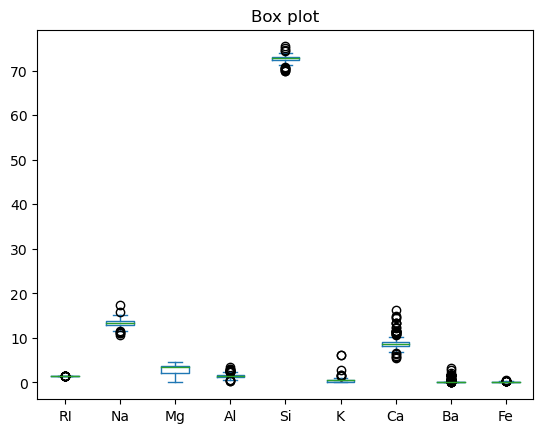

In [5]:
data.plot(kind='box', title='Box plot')

<font face="Times New Roman" size=4>We will display the histogram for the quantitative attributes by discretizing it into 8 separate bins and counting the frequency for each bin. I use a for loop to draw nine subgraphs on a figure,

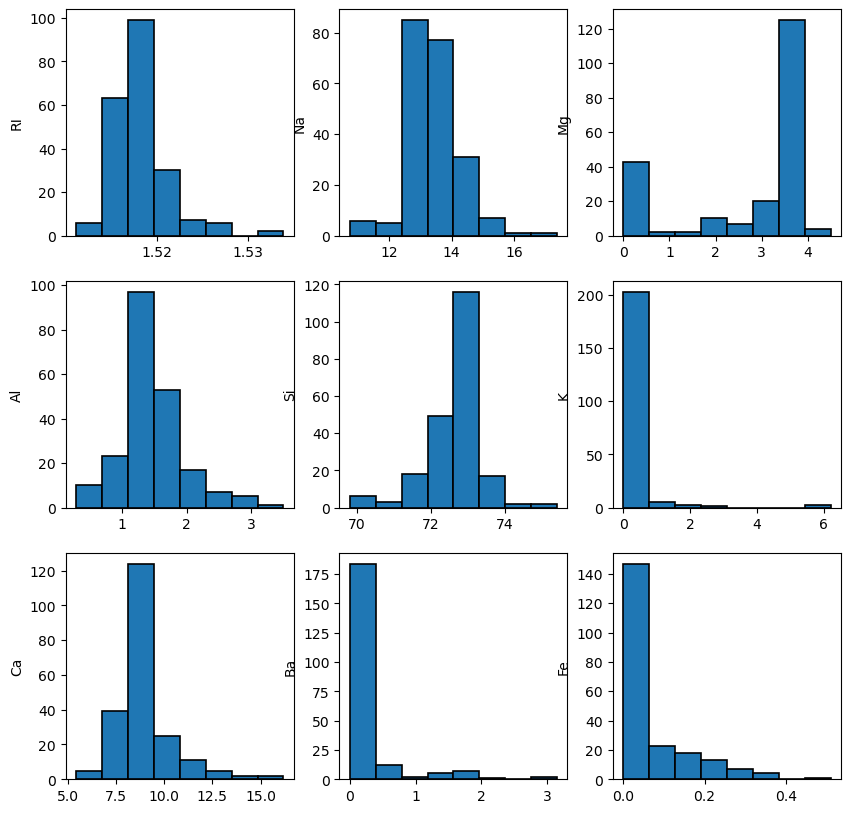

In [43]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(3,3,figsize=(10,10))
col=0
for i in range(0,3):
    for j in range(0,3):
        axes[i][j].hist(data[data.columns[col]],bins=8,edgecolor='black',linewidth=1.2)
        axes[i][j].set_ylabel(data.columns[col])
        col=col+1

<font face="Times New Roman" size=4>Parallel coordinates can be used to display all the data points simultaneously. Parallel coordinates have one coordinate axis for each attribute, but the different axes are parallel to one other instead of perpendicular, as is traditional. Furthermore, an object is represented as a line instead of as a point. In the example below, the distribution of values for each class can be identified in a separate color.

<Axes: >

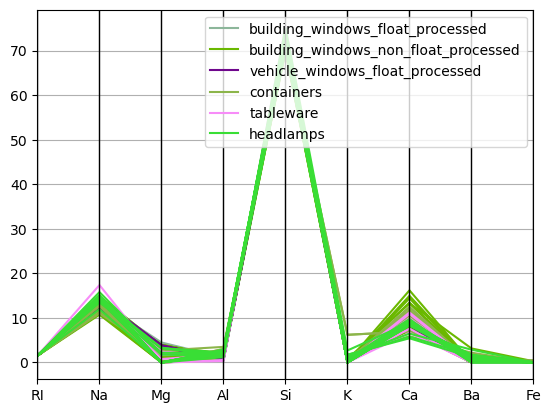

In [8]:
parallel_coordinates(data,'Type of glass')

<font face="Times New Roman" size=4>I set the color of each class and make the figure larger,

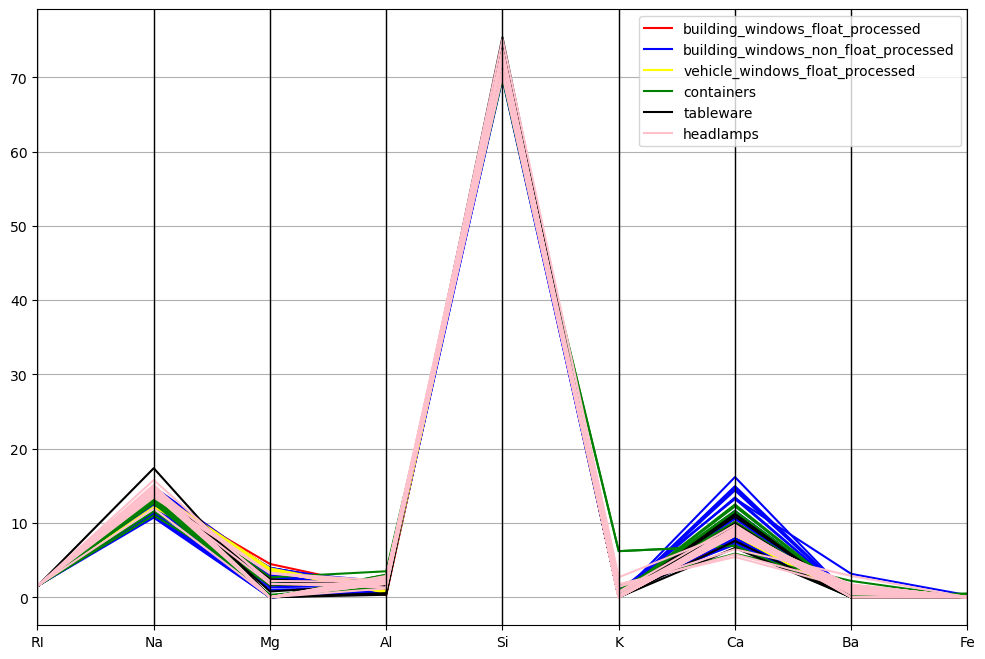

In [7]:
from pandas.plotting import parallel_coordinates
fig, ax = plt.subplots(figsize=(12, 8))
pd.plotting.parallel_coordinates(data, 'Type of glass',color=['red','blue','yellow','green','black','pink'], ax=ax)
plt.show()

<font face="Times New Roman" size=4>The violinplot shows density of the RI for each type of glass. The thinner part denotes that there is less
density whereas the fatter part conveys higher density.Now let us see how RI varies according to the type of glass.

<Axes: xlabel='Type of glass', ylabel='RI'>

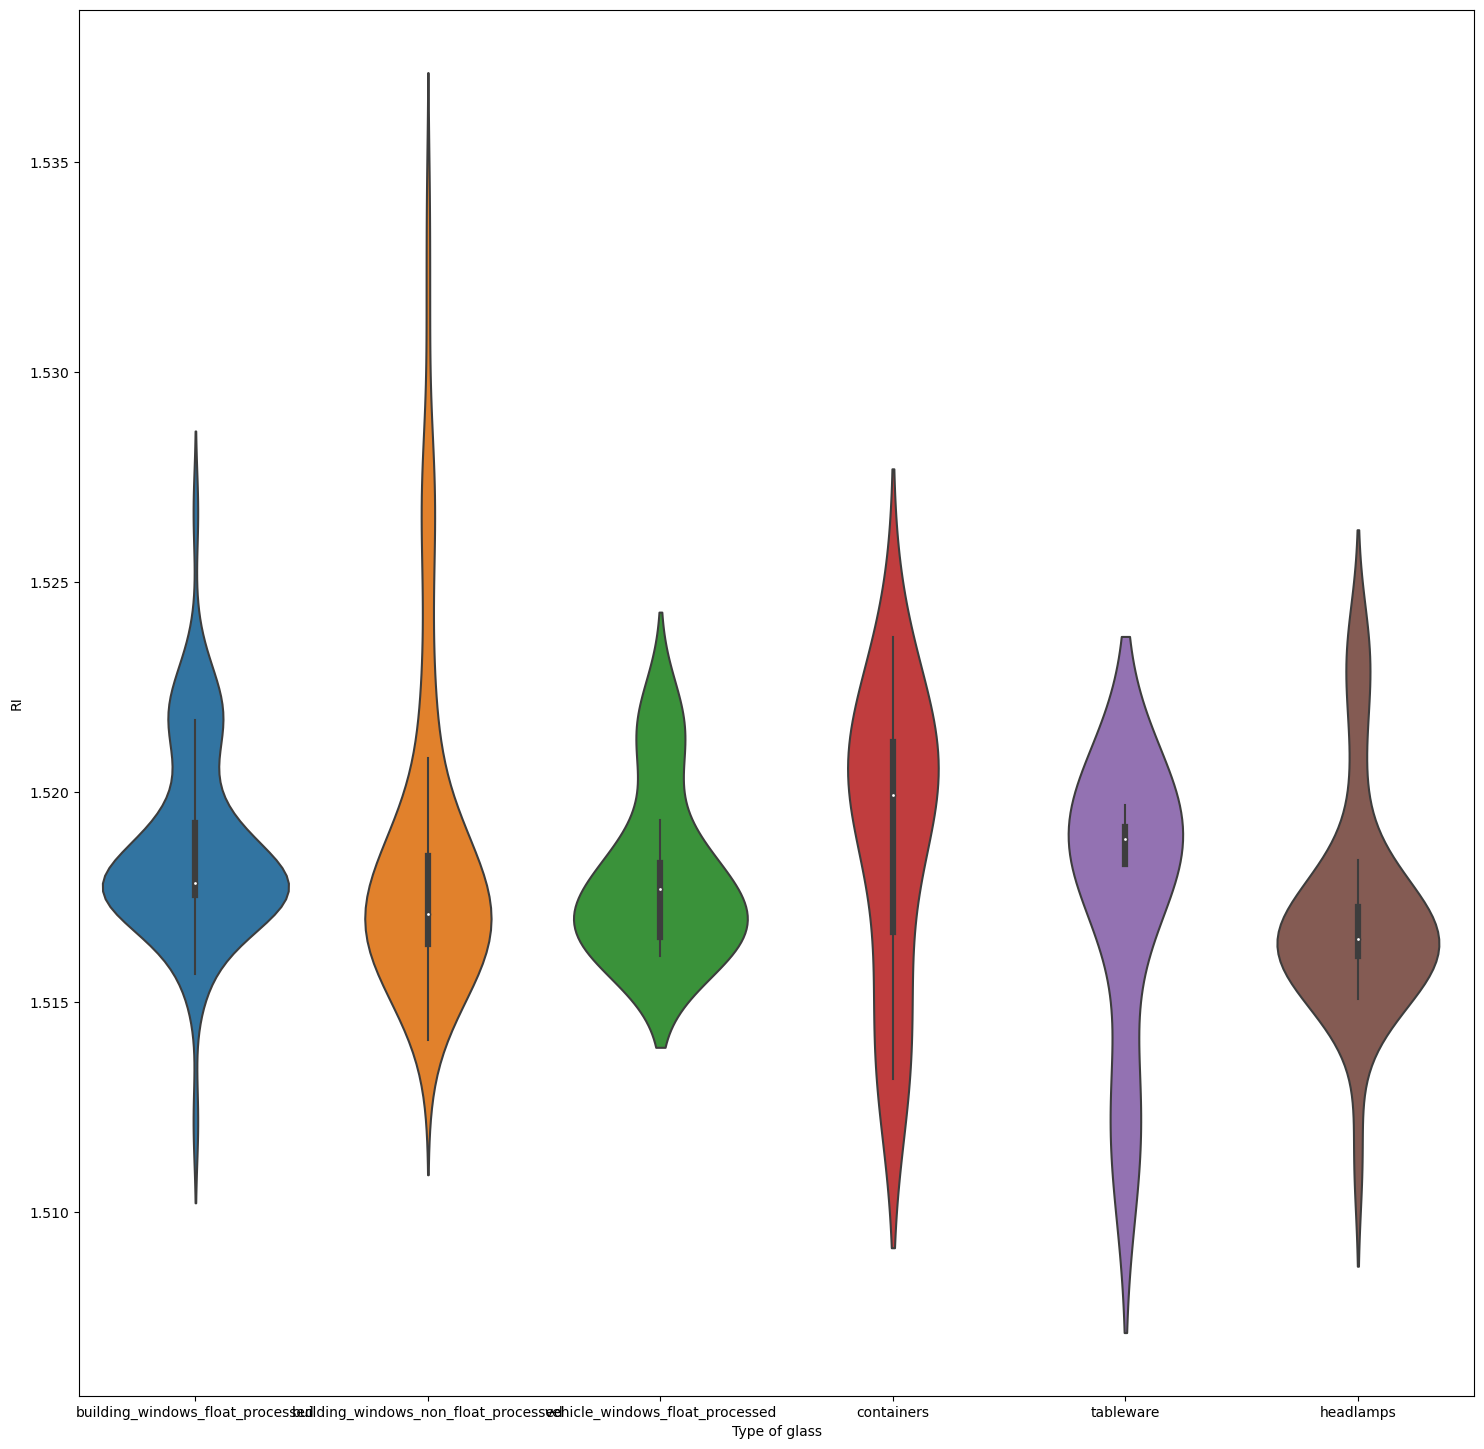

In [9]:
fig,ax = plt.subplots(figsize=(18,18),sharex=True)
sns.violinplot(x=data['Type of glass'],y=data[data.columns[0]],)

<font face="Times New Roman" size=4>The violinplot shows density of the RI and each chemical element. The thinner part denotes that there is less
density whereas the fatter part conveys higher density.Now let us see each quantitative attribute varies according to the type of glass.

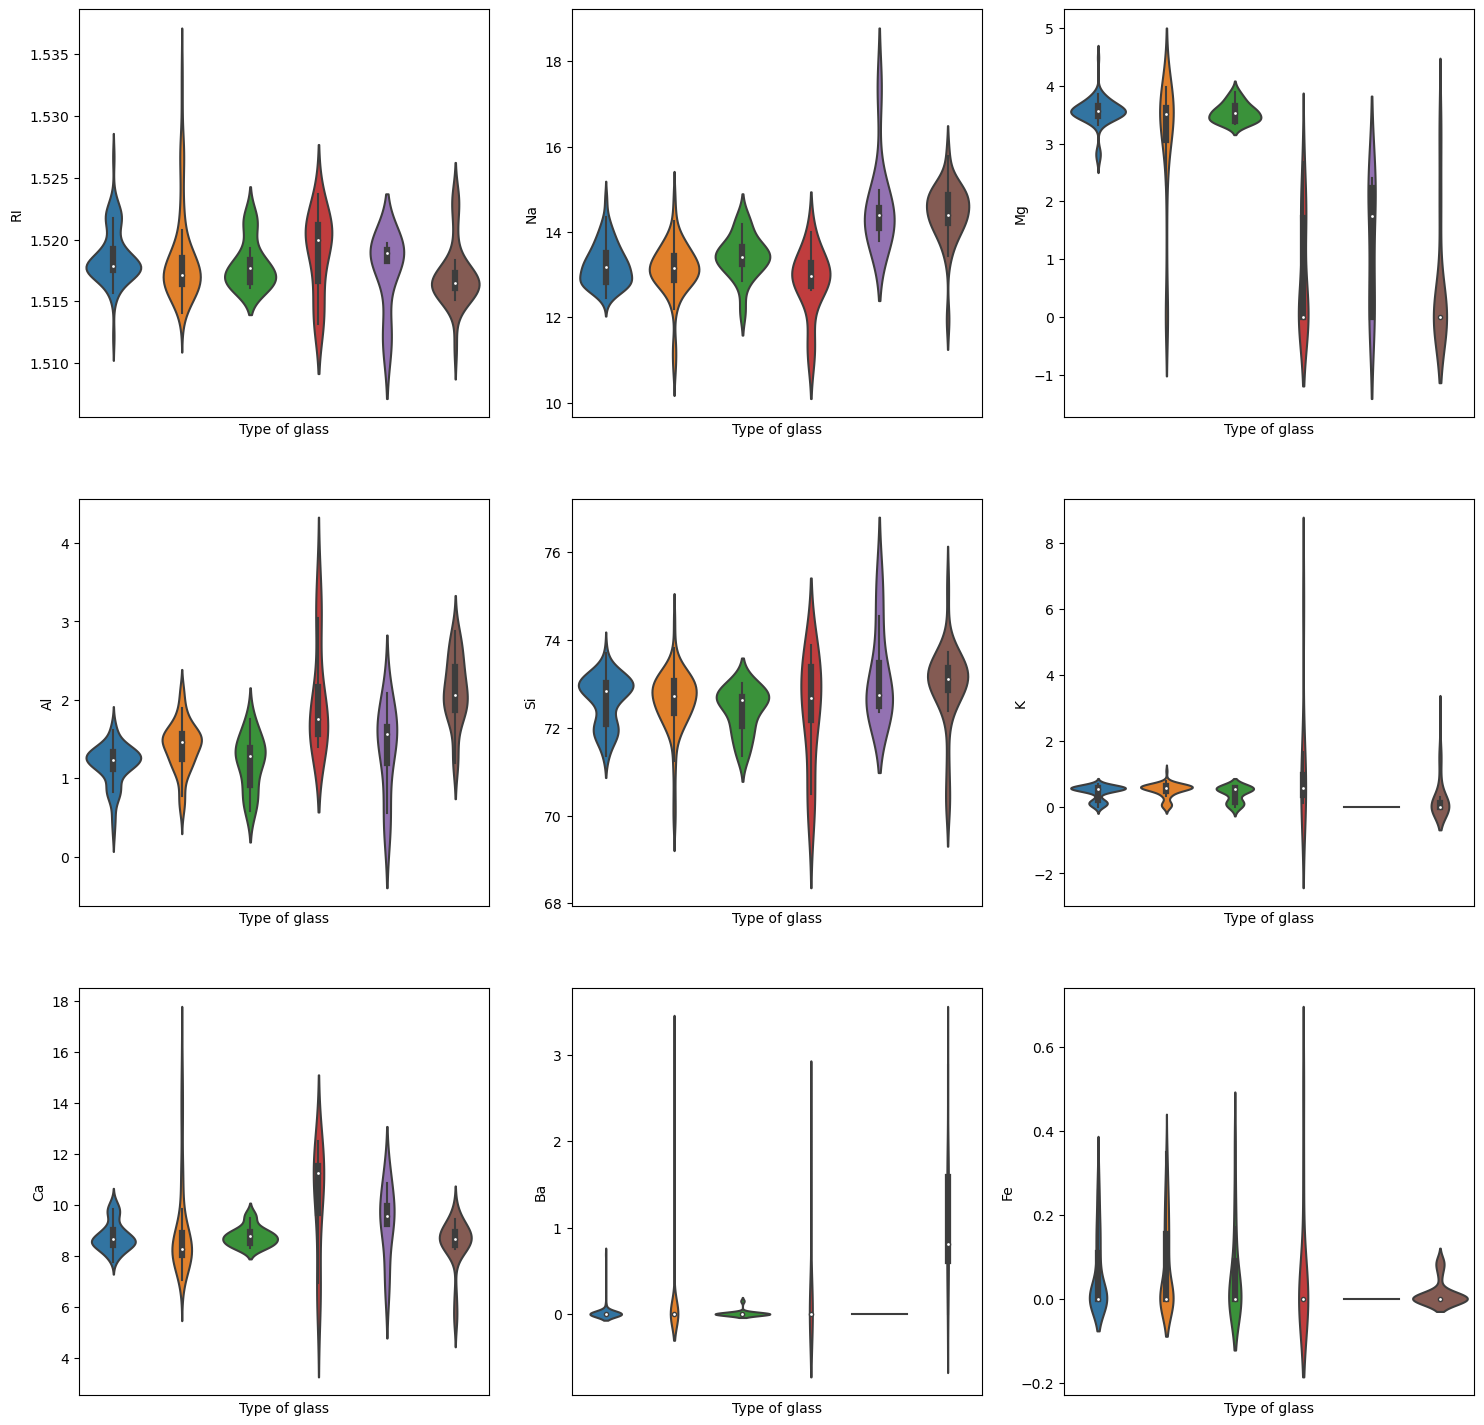

In [10]:
fig,axes = plt.subplots(3,3,figsize=(18,18),sharex=True)
col=0
for i in range(0,3):
    for j in range(0,3):
        sns.violinplot(x=data['Type of glass'],y=data[data.columns[col]],ax=axes[i][j])
        axes[i][j].set_xlabel('Type of glass')
        axes[i][j].set_ylabel(data.columns[col])
        
        axes[i][j].set_xticks([])  # 设置横坐标的刻度
        col=col+1

<font face="Times New Roman" size=4>For each pair of attributes, we can use a scatter plot to visualize their joint distribution.The following graph shows relationship between the RI and Na,

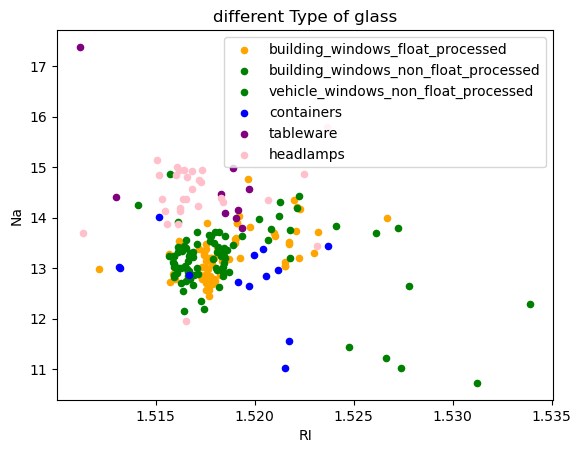

In [47]:
fig=data[data["Type of glass"] == 'building_windows_float_processed'].plot(kind='scatter',x='RI',y='Na',color='orange', 
                                                                                    label='building_windows_float_processed')
data[data["Type of glass"] == 'building_windows_non_float_processed'].plot(kind='scatter',x='RI',y='Na',color='green', 
                                                                                  label='building_windows_non_float_processed',ax=fig)

data[data["Type of glass"] == 'vehicle_windows_float_processed'].plot(kind='scatter',x='RI',y='Na',color='green', 
                                                                                  label='vehicle_windows_non_float_processed',ax=fig)
data[data["Type of glass"] == 'containers'].plot(kind='scatter',x='RI',y='Na',color='blue', 
                                                                                  label='containers',ax=fig)
data[data["Type of glass"] == 'tableware'].plot(kind='scatter',x='RI',y='Na',color='purple', 
                                                                                  label='tableware',ax=fig)
data[data["Type of glass"] == 'headlamps'].plot(kind='scatter',x='RI',y='Na',color='pink', 
                                                                                  label='headlamps',ax=fig)
fig.set_xlabel('RI')
fig.set_ylabel('Na')
fig.set_title("different Type of glass")
fig=plt.gcf()
plt.show()

<font face="Times New Roman" size=4>We see the relationship of each pair of quantitative attributes. But we could not find a clear cluster division of clusters by two attributes.

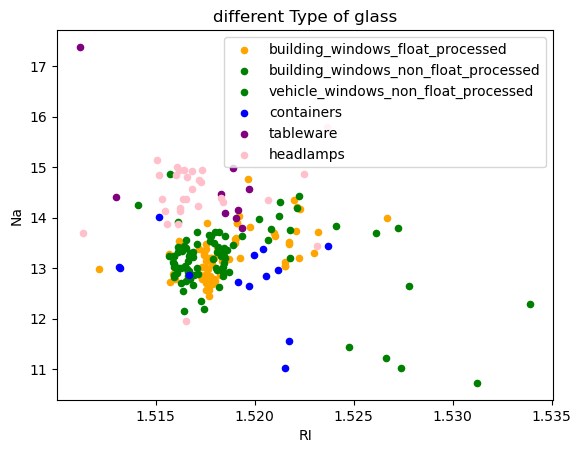

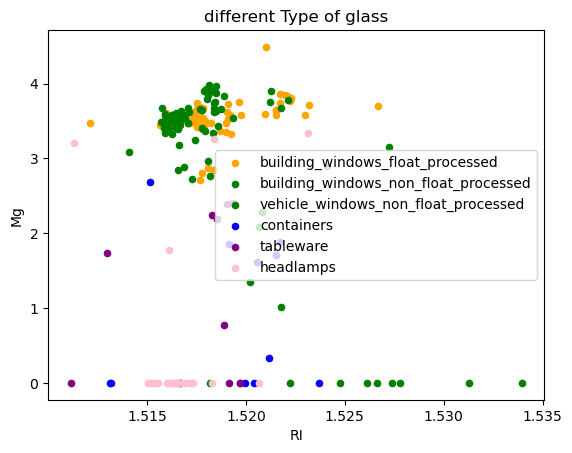

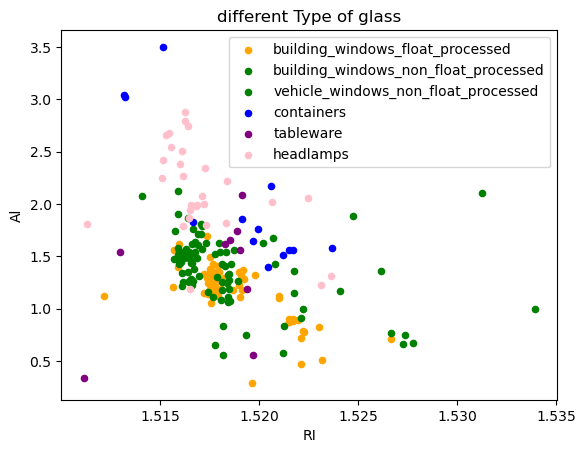

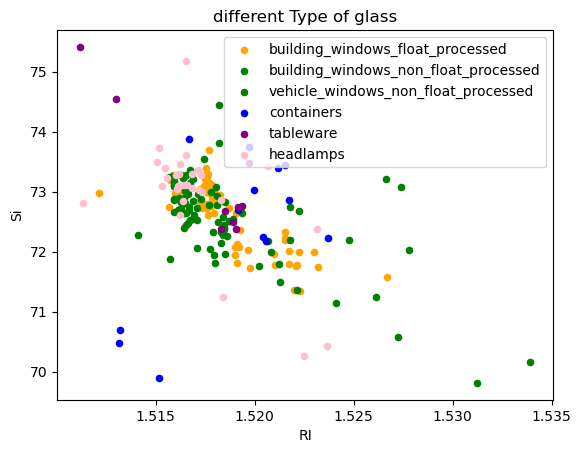

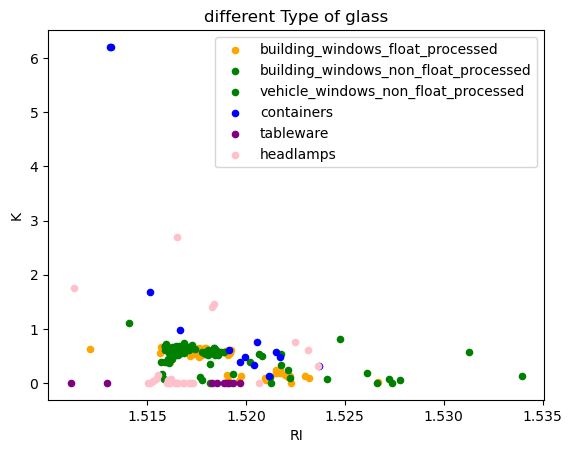

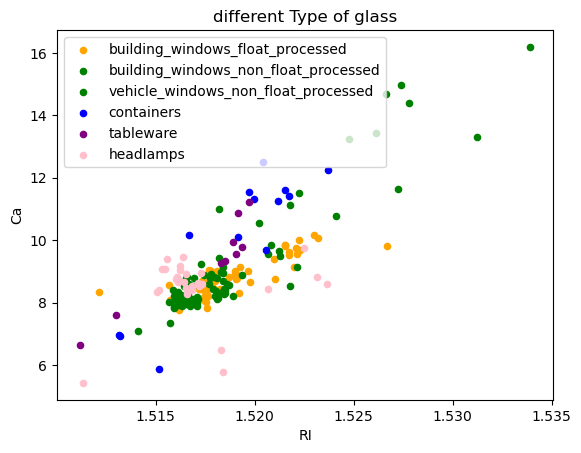

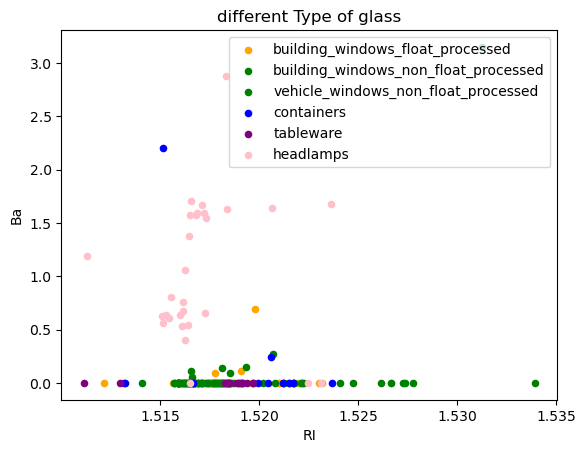

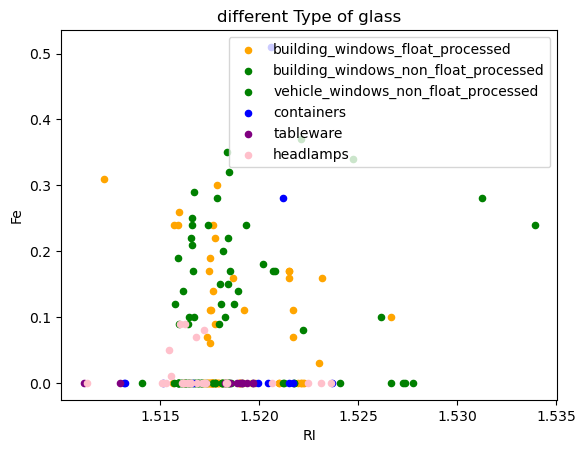

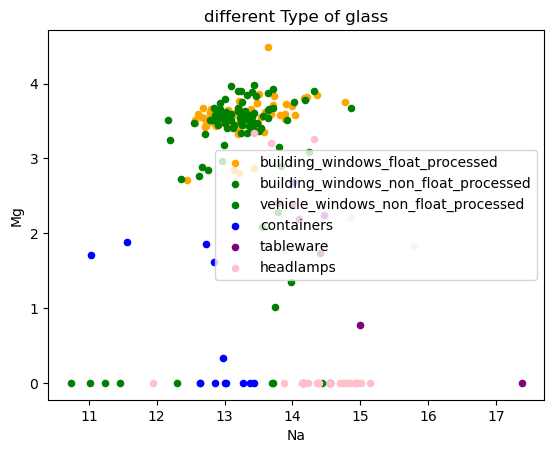

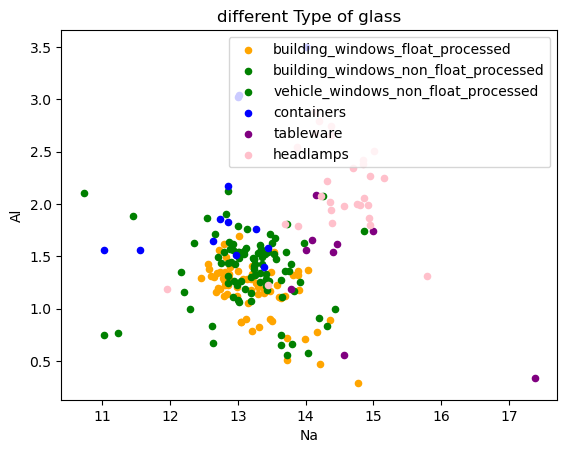

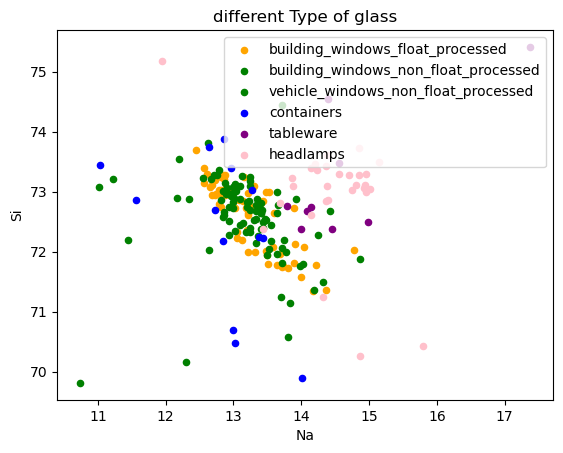

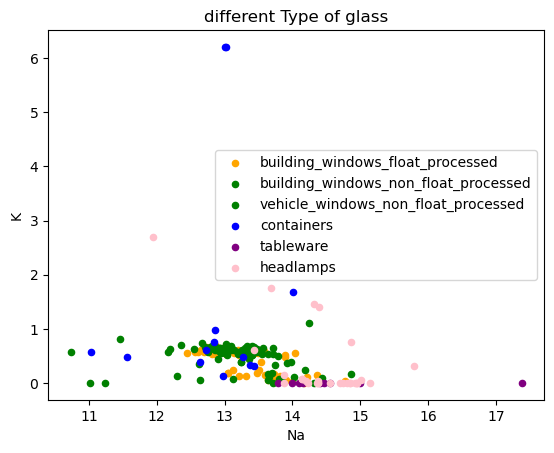

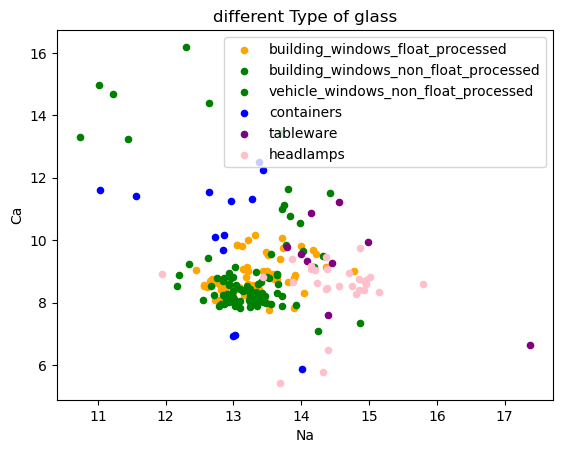

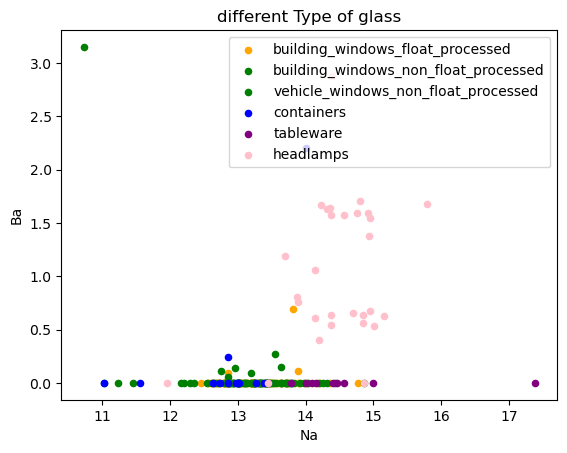

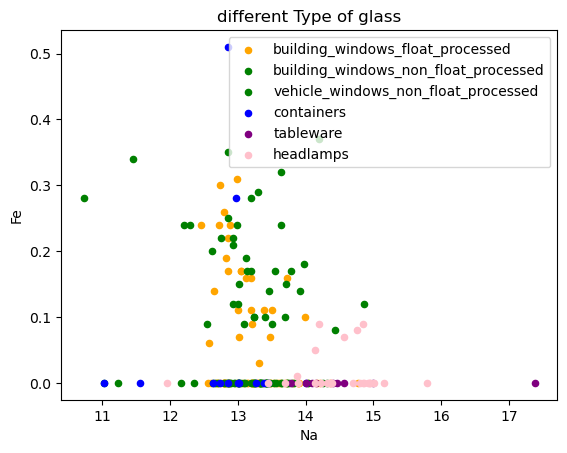

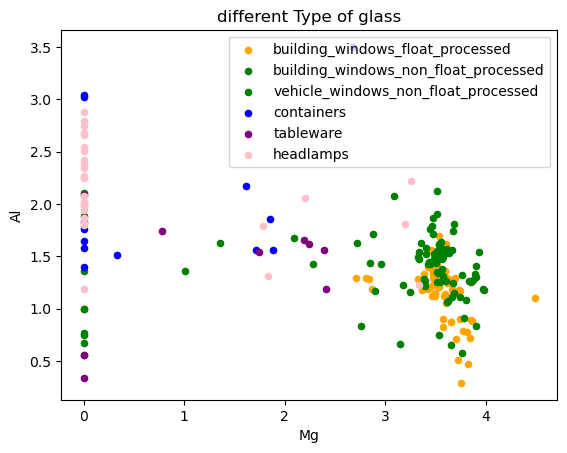

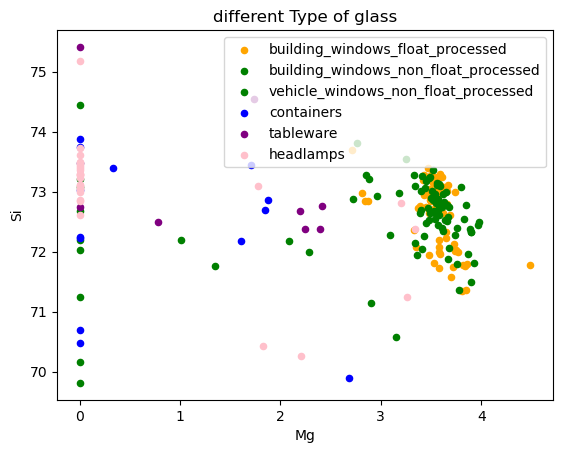

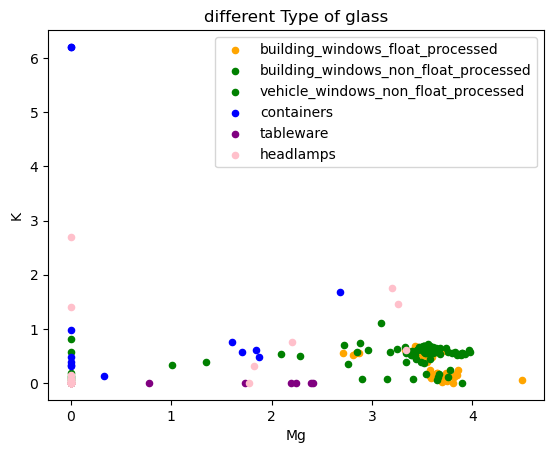

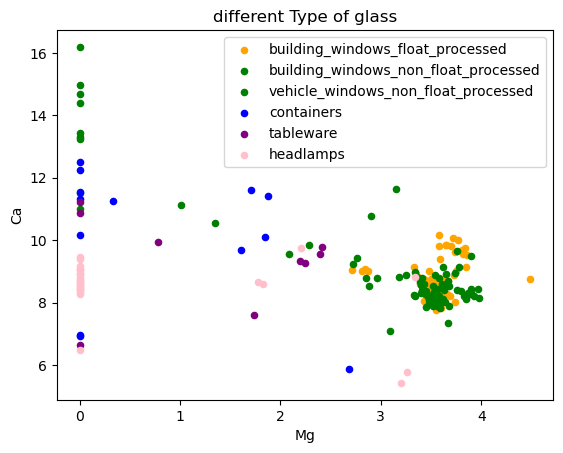

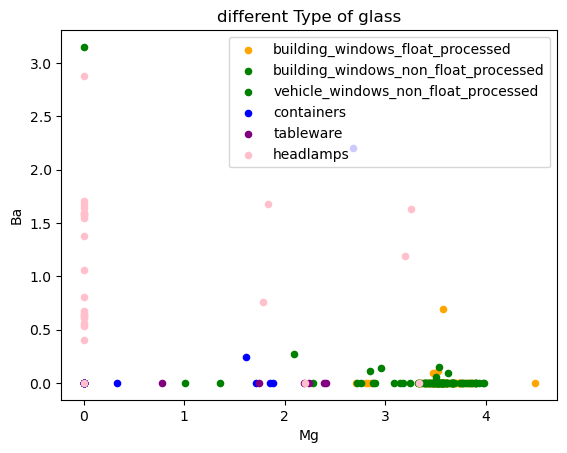

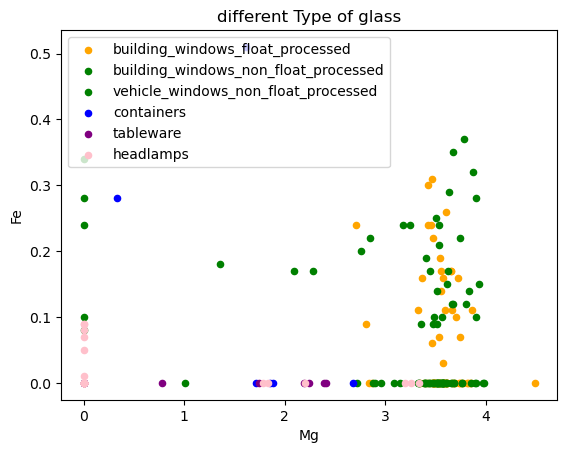

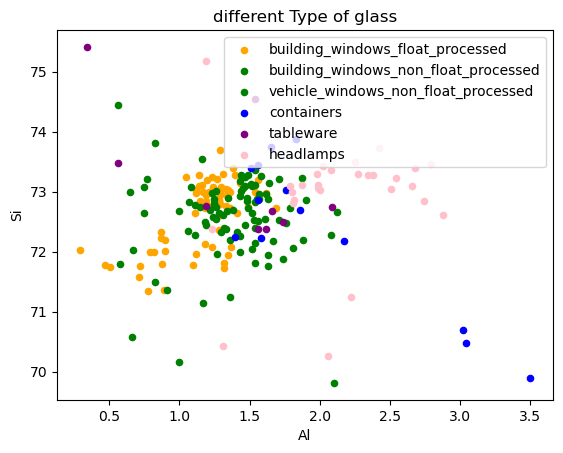

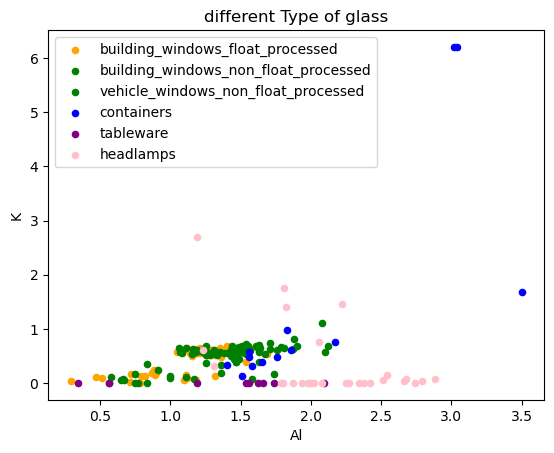

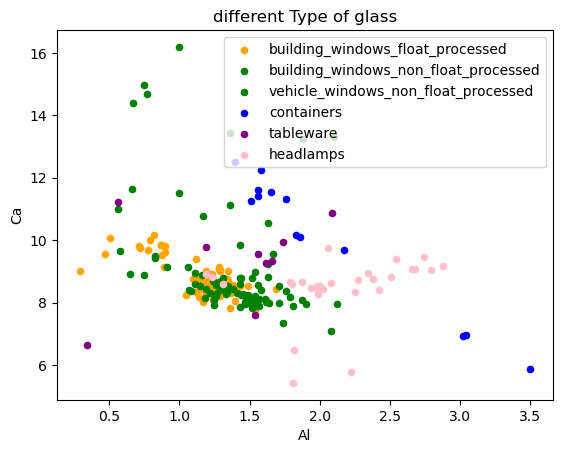

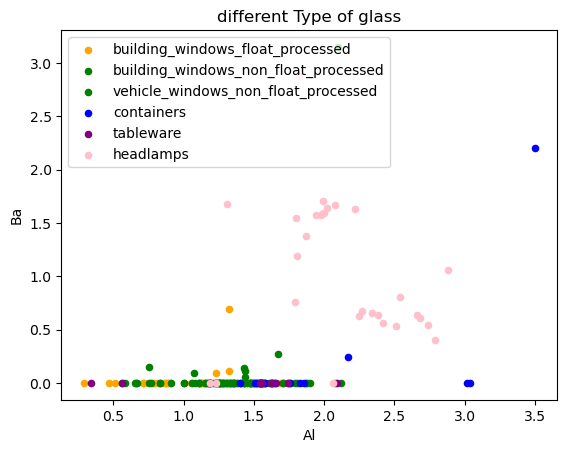

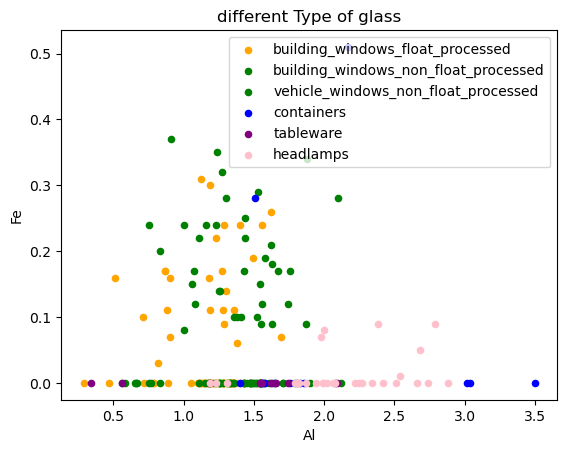

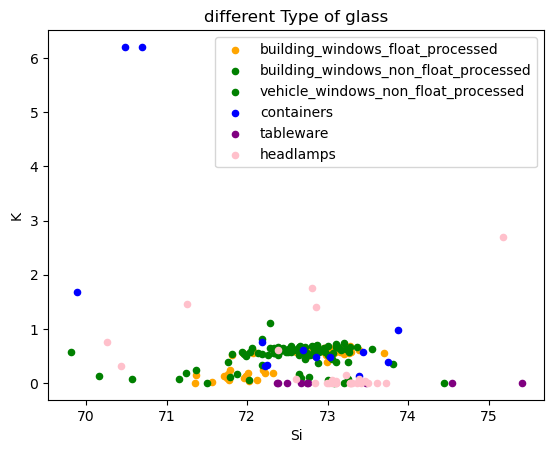

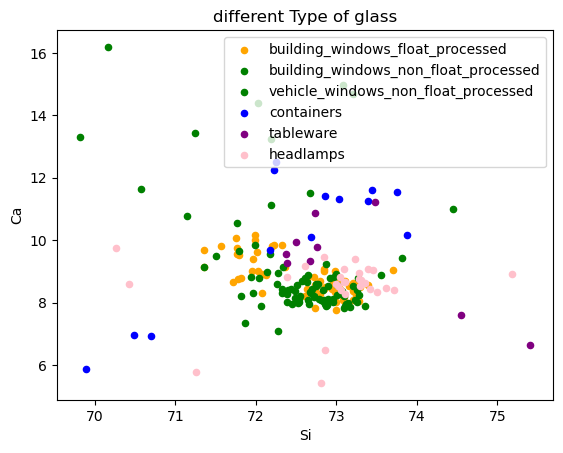

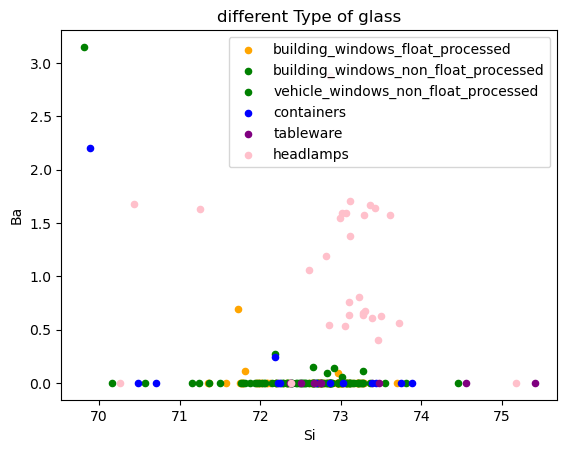

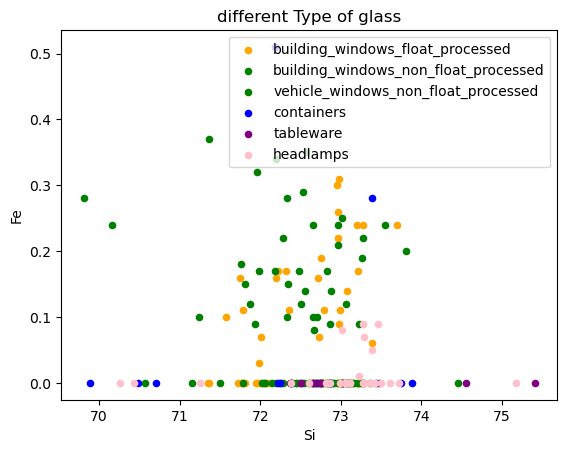

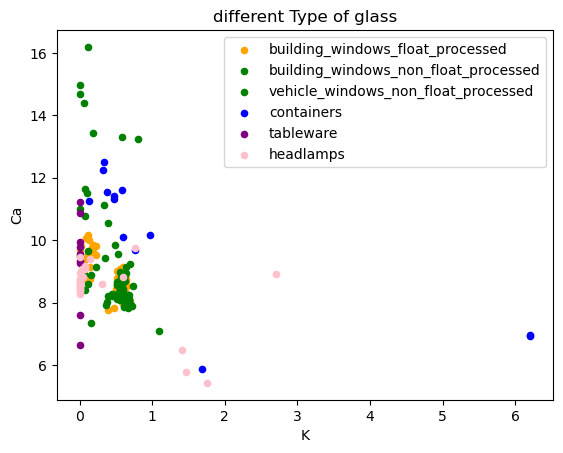

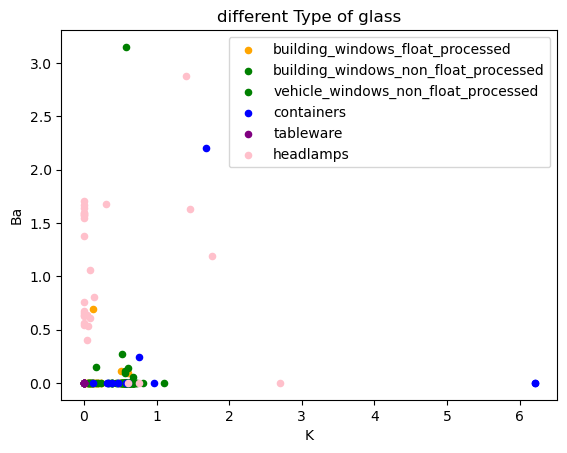

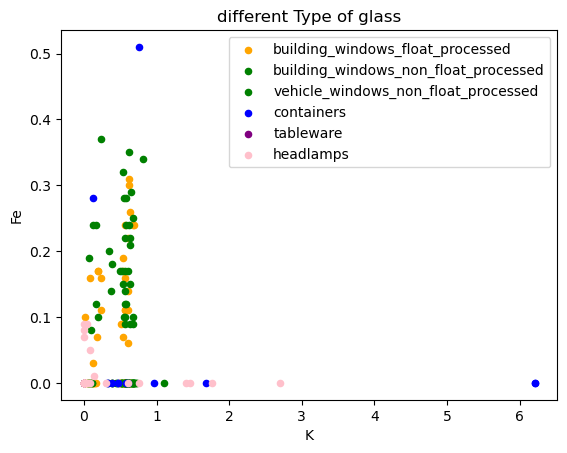

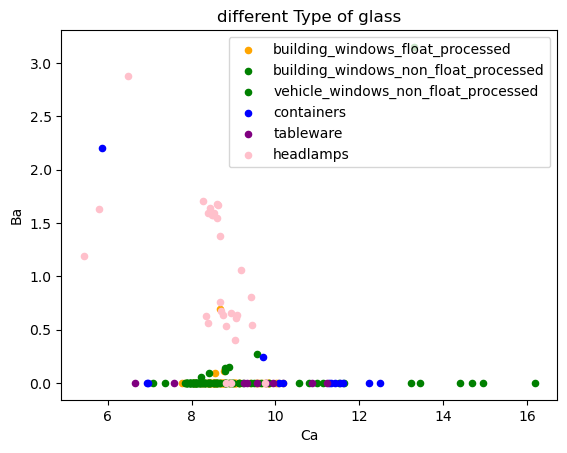

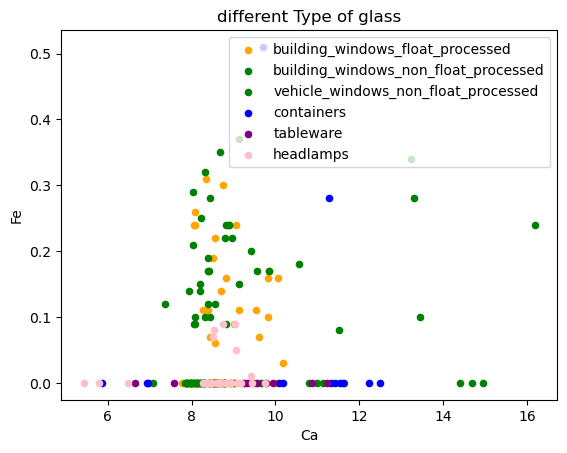

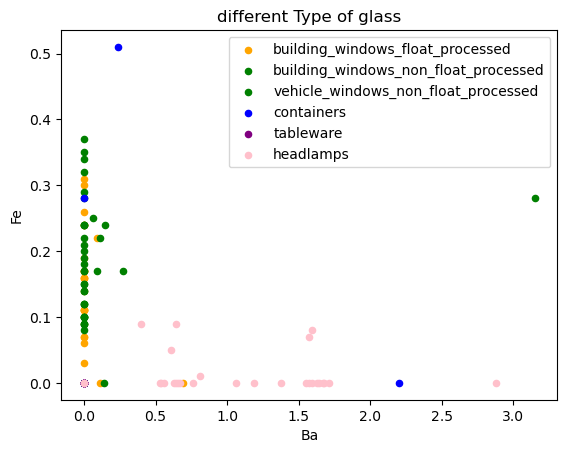

In [11]:
for k in range(0,8):
            for l in range(k+1,9):
                        fig=data[data["Type of glass"] == 'building_windows_float_processed'].plot(kind='scatter',x=k,y=l,color='orange', 
                                                                                    label='building_windows_float_processed')
                        data[data["Type of glass"] == 'building_windows_non_float_processed'].plot(kind='scatter',x=k,y=l,color='green', 
                                                                                  label='building_windows_non_float_processed',ax=fig)

                        data[data["Type of glass"] == 'vehicle_windows_float_processed'].plot(kind='scatter',x=k,y=l,color='green', 
                                                                                  label='vehicle_windows_non_float_processed',ax=fig)
                        data[data["Type of glass"] == 'containers'].plot(kind='scatter',x=k,y=l,color='blue', 
                                                                                  label='containers',ax=fig)
                        data[data["Type of glass"] == 'tableware'].plot(kind='scatter',x=k,y=l,color='purple', 
                                                                                  label='tableware',ax=fig)
                        data[data["Type of glass"] == 'headlamps'].plot(kind='scatter',x=k,y=l,color='pink', 
                                                                                  label='headlamps',ax=fig)
                        fig.set_xlabel(data.columns[k])
                        fig.set_ylabel(data.columns[l])
                        fig.set_title("different Type of glass")
                        fig=plt.gcf()
                        plt.show()

<font face="Times New Roman" size=4> we will see the correlation of attributes.We find that RI and Ca are highly correlated

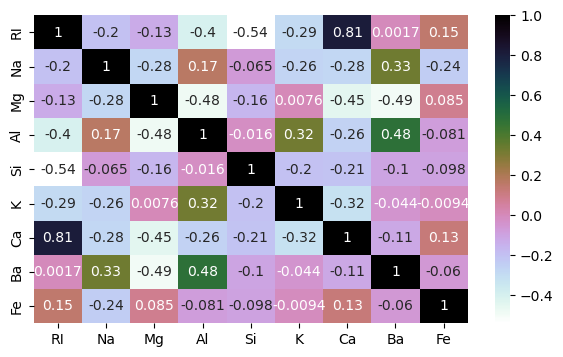

In [13]:
plt.figure(figsize=(7,4))
data1=data.drop('Type of glass',axis=1)
sns.heatmap(data1.corr(),annot=True,cmap='cubehelix_r') 
plt.show()

<font face="Times New Roman" size=4>We will be using the classification algorithms to build a model for the purpose of  solving the classification problem.

Classification: samples belong to two or more classes and we want to learn from already labeled data how to
predict the class of unlabeled data

<font face="Times New Roman" size=4>
An attribute is a property of an instance that may be used to determine its classification. In the
following dataset, the attributes are RI and eight chemical elements. It is also known as Features.

<font face="Times New Roman" size=4>
Target variable, in the machine learning context is the variable that is or should be the output. Here the target
variables are the seven types of glass.

<font face="Times New Roman" size=4>Steps To Be followed When Applying an Algorithm
1.Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it
will help in training the model better.
2.Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
3.Then pass the training dataset to the algorithm to train it. We use the .fit() method
4.Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
5.We then check the accuracy by passing the predicted outcome and the actual output to the model.
Splitting The Data into Training And Testing Dataset

<font face="Times New Roman" size=4>1.Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it
will help in training the model better.

In [8]:
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn import tree #for using Decision Tree Algoithm
from sklearn import linear_model
from sklearn.metrics import accuracy_score
train, test = train_test_split(data, train_size = 0.8)# in this our main data is split into train and test
print(train.shape)
print(test.shape)

(170, 10)
(43, 10)


In [9]:
train_x=train.drop(['Type of glass'],axis=1)
train_y=train['Type of glass']
test_x=test.drop(['Type of glass'],axis=1)
test_y=test['Type of glass']

Lets check the Train and Test Dataset

In [10]:
train_x.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
12,1.51589,12.88,3.43,1.40,73.28,0.69,8.05,0.00,0.24
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24
206,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.00
64,1.52172,13.48,3.74,0.90,72.01,0.18,9.61,0.00,0.07


In [11]:
train_y.head(5)

0          building_windows_float_processed
12         building_windows_float_processed
144    building_windows_non_float_processed
206                               headlamps
64         building_windows_float_processed
Name: Type of glass, dtype: object

In [12]:
test_x.head(5)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
102,1.51820,12.62,2.76,0.83,73.81,0.35,9.42,0.0,0.20
78,1.51613,13.92,3.52,1.25,72.88,0.37,7.94,0.0,0.14
131,1.52614,13.70,0.00,1.36,71.24,0.19,13.44,0.0,0.10
117,1.51708,13.72,3.68,1.81,72.06,0.64,7.88,0.0,0.00
57,1.51824,12.87,3.48,1.29,72.95,0.60,8.43,0.0,0.00


In [13]:
test_y.head(5)

102    building_windows_non_float_processed
78     building_windows_non_float_processed
131    building_windows_non_float_processed
117    building_windows_non_float_processed
57         building_windows_float_processed
Name: Type of glass, dtype: object

<font face="Times New Roman" size=4>2.Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
   
    We first use decision tree.

<font face="Times New Roman" size=4>We will use all the features for training the algorithm and check the accuracy.

In this example, we reserve 80% of the labeled data for training and the remaining 20% for testing. We then fit decision trees of different maximum depths (from 2 to 50) to the training set and plot their respective accuracies when applied to the training and test sets.

The accuracy of decision tree
Max depths= 2  train Accuracy=0.63  test Accuracy=0.58
Max depths= 3  train Accuracy=0.72  test Accuracy=0.67
Max depths= 4  train Accuracy=0.78  test Accuracy=0.63
Max depths= 5  train Accuracy=0.85  test Accuracy=0.63
Max depths= 6  train Accuracy=0.88  test Accuracy=0.63
Max depths= 7  train Accuracy=0.94  test Accuracy=0.47
Max depths= 8  train Accuracy=0.98  test Accuracy=0.65
Max depths= 9  train Accuracy=0.99  test Accuracy=0.56
Max depths= 10  train Accuracy=0.99  test Accuracy=0.51
Max depths= 15  train Accuracy=1.00  test Accuracy=0.58
Max depths= 20  train Accuracy=1.00  test Accuracy=0.58
Max depths= 25  train Accuracy=1.00  test Accuracy=0.51
Max depths= 30  train Accuracy=1.00  test Accuracy=0.56
Max depths= 35  train Accuracy=1.00  test Accuracy=0.56
Max depths= 40  train Accuracy=1.00  test Accuracy=0.60
Max depths= 45  train Accuracy=1.00  test Accuracy=0.58
Max depths= 50  train Accuracy=1.00  test Accuracy=0.60


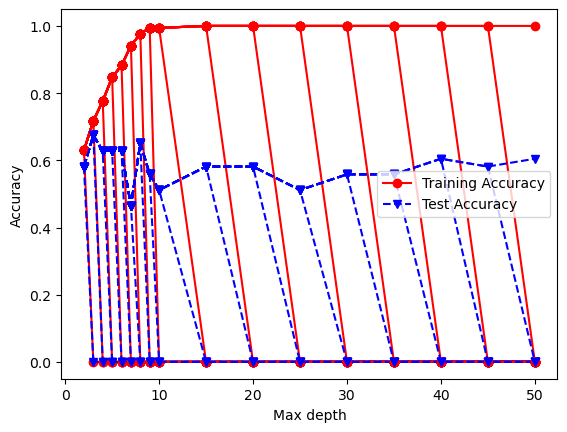

In [14]:
print('The accuracy of decision tree')
maxdepths = [2,3,4,5,6,7,8,9,10,15,20,25,30,35,40,45,50]
trainAcc = np.zeros(len(maxdepths))
testAcc = np.zeros(len(maxdepths))

index = 0
for depth in maxdepths:
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(train_x, train_y)
    predtrain_y = clf.predict(train_x)
    predtest_y = clf.predict(test_x)
    trainAcc[index] = accuracy_score(train_y, predtrain_y)
    testAcc[index] = accuracy_score(test_y, predtest_y)
    index += 1
    
    plt.plot(maxdepths,trainAcc,'ro-',maxdepths,testAcc,'bv--')
    plt.legend(['Training Accuracy','Test Accuracy'])
    plt.xlabel('Max depth')
    plt.ylabel('Accuracy')
    print('Max depths=',depth,' train Accuracy=%.2f'%accuracy_score(train_y, predtrain_y),' test Accuracy=%.2f'%accuracy_score(test_y, predtest_y))
 

By above graph,we don't find Obvious model overfitting problem

<font face="Times New Roman" size=4>Support Vector Machine (SVM)

In [15]:
clf = svm.SVC() 
clf.fit(train_x,train_y) 
predtrain_y=clf.predict(train_x)
predtest_y=clf.predict(test_x)
print('The  accuracy of the SVM: ')
print('train accuracy=%.2f'%accuracy_score(predtrain_y,train_y),' test accuracy=%.2f'%accuracy_score(predtest_y,test_y))

The  accuracy of the SVM: 
train accuracy=0.36  test accuracy=0.35


We then fit SVM of different hyperparameter C (from 2 to 100) to the training set and plot their respective accuracies when applied to the training and test sets.

Text(0, 0.5, 'Accuracy')

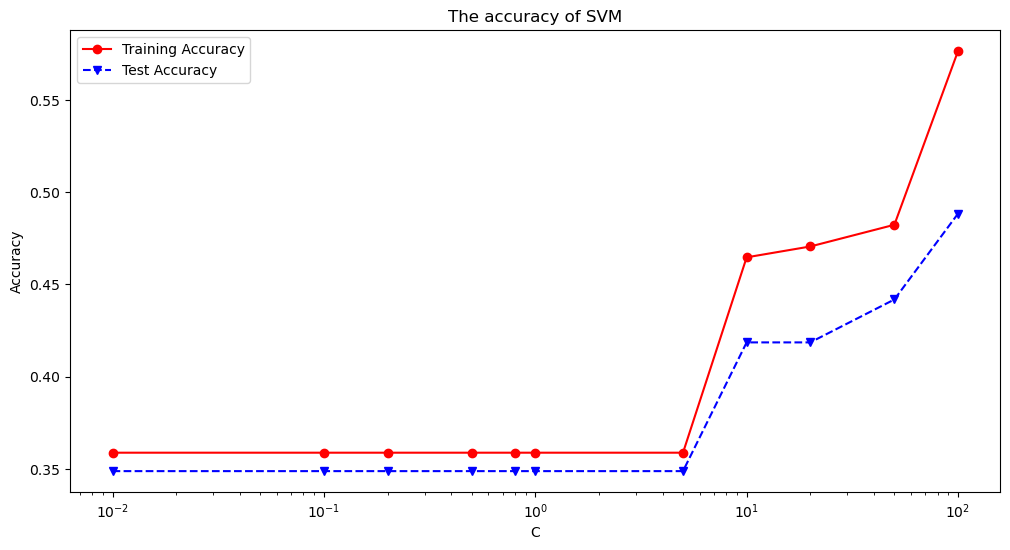

In [16]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20,50,100]
SVMtrainAcc = []
SVMtestAcc = []

for param in C:
    clf = svm.SVC(C=param)
    clf.fit(train_x, train_y)
    predtrain_y = clf.predict(train_x)
    predtest_y = clf.predict(test_x)
    SVMtrainAcc.append(accuracy_score(train_y, predtrain_y))
    SVMtestAcc.append(accuracy_score(test_y, predtest_y))

fig, ax = plt.subplots( figsize=(12,6))
ax.set_title('The accuracy of SVM')
ax.plot(C, SVMtrainAcc, 'ro-', C, SVMtestAcc,'bv--')
ax.legend(['Training Accuracy','Test Accuracy'])
ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_ylabel('Accuracy')

In [17]:
clf = linear_model.LogisticRegression(C=20)
clf.fit(train_x, train_y)
predtrain_y = clf.predict(train_x)
predtest_y = clf.predict(test_x)
print('The  accuracy of the LogicRegression: ')
print('train accuracy=%.2f'%accuracy_score(predtrain_y,train_y),' test accuracy=%.2f'%accuracy_score(predtest_y,test_y))

#不懂为什么这个逻辑回归有警告

The  accuracy of the LogicRegression: 
train accuracy=0.68  test accuracy=0.58


D:\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
#下面这些代码，是选一部分变量用决策树，但不知道用哪几个变量好，因为我们老师发的参考PDF后面一个决策树只选了两个变量

In [19]:
data3=data[['RI','Ba','Na','Type of glass']]
train_RMB, test_RMB = train_test_split(data3, train_size = 0.8)
train_RMB_x=train_RMB.drop(['Type of glass'],axis=1)
train_RMB_y=train_RMB['Type of glass']
test_RMB_x=test_RMB.drop(['Type of glass'],axis=1)
test_RMB_y=test_RMB['Type of glass']
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(train_RMB_x, train_RMB_y)
predtest_y = clf.predict(test_RMB_x)

print('accuracy=%.2f'%accuracy_score(predtest_y,test_RMB_y))

accuracy=0.60


<font face="Times New Roman" size=4>I redownloaded the data set and removed duplicates. Then I normalized the data. I used PCA principal component analysis for dimensionality reduction, and then used Kmeans algorithm to cluster the data after dimensionality reduction.

<font face="Times New Roman" size=4>I used PCA (principal component analysis) for dimensionality reduction, and then used Kmeans algorithm to cluster the data after dimensionality reduction.

[0.2789058  0.22868548]


D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


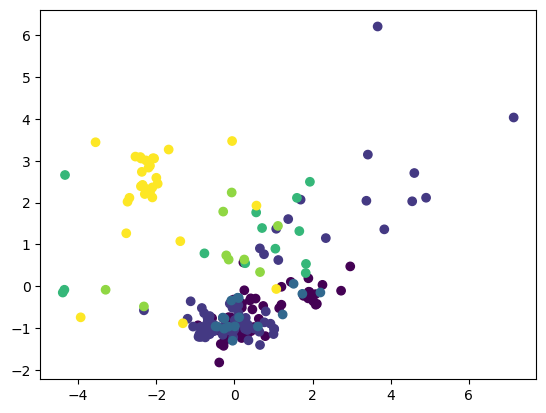

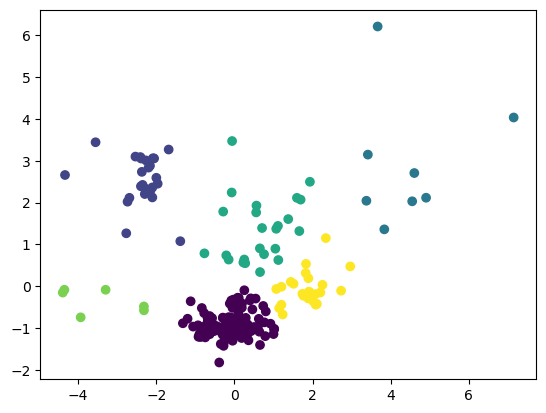

In [24]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
data=pd.read_csv('file:///F:/python/anaconda/glass+identification/glass.data',header=None) #读数据，无表头
data.columns = ['Id number', 'RI', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe','Type of glass']
data= data.drop(['Id number'],axis=1)
data= data.drop_duplicates() #删除重复项
data=data-np.mean(data,axis=0)  #减去均值
data=data/np.std(data,axis=0)  #归一化
pca=PCA(n_components=2) #创建一个PCA对象，将数据降维到2个属性。
xtrain=pca.fit_transform(data[['RI', 'Na', 'Mg', 'Al','Si','K','Ca','Ba','Fe']]) #训练 降维2个属性。
print(pca.explained_variance_ratio_)  #打印降维后每个主成分所解释的方差比例。
ytrain=data['Type of glass']          #类型赋给ytrain
clf = KMeans(n_clusters=6)         #创建一个KMeans对象，设置聚类簇数为6。
pre=clf.fit_predict(xtrain)        #使用KMeans算法对降维后的数据进行聚类。


plt.figure(1)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)
plt.figure(2)
plt.scatter(xtrain[:,0],xtrain[:,1],c=pre,label=pre) #绘制聚类结果的散点图，其中x轴为第一个主成分，
                                                #y轴为第二个主成分，颜色根据聚类标签pre进行标记。


#你看这两个图为什么差这么多